# Lab 04

⚠️ Do-over

Spatial filtering
- Lowpass (smoothing)
    - Box filter
    - Gaussian blur
    - Median filter (for salt & pepper noise)
- Highpass (sharpening)
    - Laplacian (second-order derivative)
    - Unsharp masking (uses Gaussian filter)
    - Roberts cross and Sobel (first-order derivatives)

In [94]:
import cv2
import numpy as np
from custom_io import plot_images

### Gaussian blur

Compute the kernel using the [Gaussian function](https://mathworld.wolfram.com/GaussianFunction.html)

$ G(x,y) = \frac{1}{{2\pi \sigma^2}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} $

where $(x, y)$ are the coordinates of the point. The center of the window is the origin.

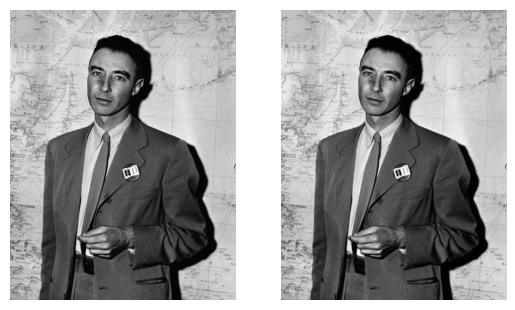

In [53]:
oppenheimer = cv2.imread("data/oppenheimer.jpg", 0)
blurred = cv2.GaussianBlur(oppenheimer, (11, 11), 0) # last parameter is sigma, passed as 0 for auto-compute
plot_images(oppenheimer, blurred)

### Image sharpening with Laplacian operator

$\nabla^2 f = f(x + 1, y) + f(x - 1, y) + f(x, y + 1) + f(x, y - 1) - 4 f(x, y)$

$g(x, y) = f(x, y) + c [\nabla^2 f(x, y)]$

Take $c$ as negative for this particular kernel.

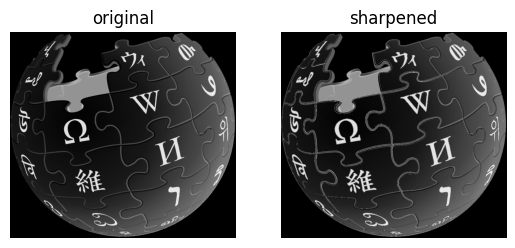

In [111]:
wikipedia = cv2.imread("data/wikipedia_black.png", 0)

kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
edges = cv2.filter2D(wikipedia, -1, kernel)
sharpened = wikipedia - edges

plot_images(wikipedia, "original", sharpened, "sharpened")

### Unsharp masking

Let $\overline{f}(x, y)$ denote the blurred image

$g_{mask}(x, y) = f(x, y) - \overline{f}(x, y)$

$g(x, y) = f(x, y) + k * g_{mask}(x, y) \qquad k \geq 0$

One can think of $g_{mask}$ as storing edges, which are then added back to the original image.



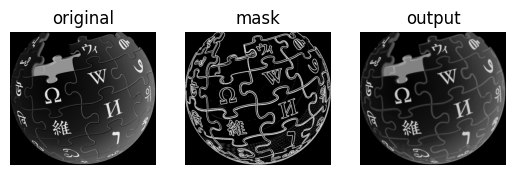

In [ ]:
wikipedia = cv2.imread('data/wikipedia_black.png', 0)

k = 0.15
mask = wikipedia - cv2.GaussianBlur(wikipedia, (11, 11), 0)
unsharped = wikipedia + k * mask

plot_images(wikipedia, 'original', mask, 'mask', unsharped, 'output')

### Edge detection

**The simple gradient**

⚠️ $\nabla f \neq \sqrt{\nabla^2 f}$

A good approximation of the gradient is given by

$ M(x, y) = |f(x + 1, y) - f(x, y)| + |f(x, y + 1) - f(x, y)| $

which produces very sad and dull edges.

A better alternative is computing the Sobel edges, which also essentially approximates $\nabla f$.

**Roberts cross gradient**

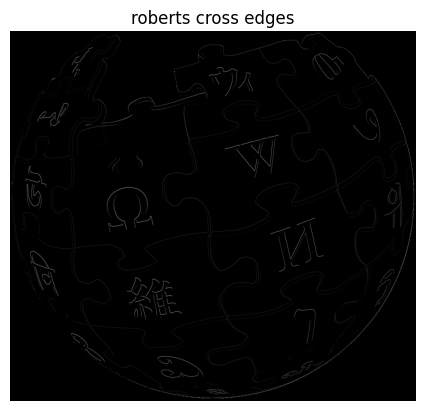

In [96]:
kernel_A = np.array([[-1, 0], [0, 1]], dtype=np.float32) # da z9 - z5 component
A = cv2.filter2D(wikipedia, -1, kernel=kernel_A)

kernel_B = np.array([[0, -1], [1, 0]], dtype=np.float32)
B = cv2.filter2D(wikipedia, -1, kernel=kernel_B)

robert_edges = np.hypot(A, B)

plot_images(robert_edges, 'roberts cross edges')

**Sobel operators**

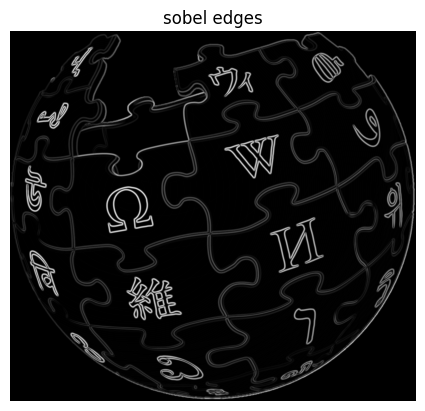

In [83]:
blurred = cv2.GaussianBlur(wikipedia, (5, 5), 5)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

grad_x = cv2.filter2D(blurred, ddepth=cv2.CV_32F, kernel=sobel_x)
grad_y = cv2.filter2D(blurred, ddepth=cv2.CV_32F, kernel=sobel_y)

grad = np.hypot(grad_x, grad_y)

plot_images(grad, 'sobel edges')

### Compare box filter and gaussian filter

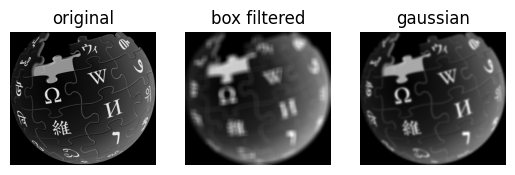

In [84]:
box_filtered = cv2.blur(wikipedia, (51, 51))
gaussian = cv2.GaussianBlur(wikipedia, (51, 51), 0)

plot_images(wikipedia, 'original', box_filtered, 'box filtered', gaussian, 'gaussian')

### Unecessary side note

Matplotlib will automatically normalize images with `dtype=np.float32` before displaying them.

```image[x][y] = (image[x][y] - min) / (max - min)```

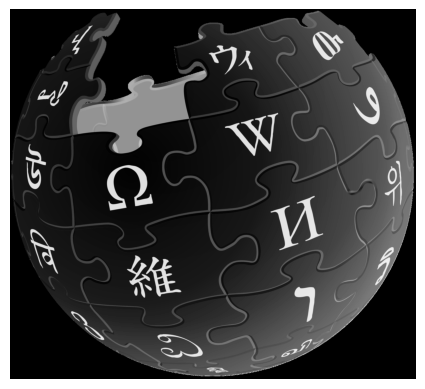

In [134]:
asdf = cv2.imread("data/wikipedia_black.png", 0)

# conver to np.float32
asdf = asdf.astype(np.float32)

# now some weird operartion to throw everything out of bounds
asdf = (asdf + 1000) / 3 + 25.5

plot_images(asdf) # shows the normalized image